<a href="https://colab.research.google.com/github/nilsugungor/deutsche-bahn-delays/blob/main/prophet_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import kagglehub

path = kagglehub.dataset_download("nokkyu/deutsche-bahn-db-delays")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'deutsche-bahn-db-delays' dataset.
Path to dataset files: /kaggle/input/deutsche-bahn-db-delays


In [15]:
import pandas as pd
import os

csv_file = os.path.join(path, "DBtrainrides.csv")
df = pd.read_csv(csv_file)

df.head()

,ID,line,path,eva_nr,category,station,state,city,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,info,arrival_delay_check,departure_delay_check
0,1573967790757085557-2407072312-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,2024-07-08 00:00:00,2024-07-08 00:01:00,2024-07-08 00:03:00,2024-07-08 00:04:00,3,3,NaN,on_time,on_time
1,349781417030375472-2407080017-1,18,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,50.767800,NaN,2024-07-08 00:17:00,NaN,NaN,0,0,NaN,on_time,on_time
2,7157250219775883918-2407072120-25,1,Hamm(Westf)Hbf|Kamen|Kamen-Methler|Dortmund-Ku...,8000406,4,Aachen-Rothe Erde,Nordrhein-Westfalen,Aachen,52066,6.116475,50.770202,2024-07-08 00:03:00,2024-07-08 00:04:00,2024-07-08 00:03:00,2024-07-08 00:04:00,0,0,NaN,on_time,on_time
3,349781417030375472-2407080017-2,18,Aachen Hbf,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,NaN,NaN,0,0,NaN,on_time,on_time
4,1983158592123451570-2407080010-3,33,Herzogenrath|Kohlscheid,8000404,5,Aachen West,Nordrhein-Westfalen,Aachen,52072,6.070715,50.780360,2024-07-08 00:20:00,2024-07-08 00:21:00,2024-07-08 00:20:00,2024-07-08 00:21:00,0,0,NaN,on_time,on_time


In [16]:
#hourly snapshot
df['arrival_plan'] = pd.to_datetime(df['arrival_plan'])
df['hour'] = df['arrival_plan'].dt.floor('h')

###Choosing München Ost station as the example for this case

In [17]:
from prophet import Prophet
import matplotlib.pyplot as plt

station = 'München Ost'
ts = df[df['station']==station].groupby('hour')['arrival_delay_m'].mean().reset_index()
ts.rename(columns={'hour':'ds','arrival_delay_m':'y'}, inplace=True)

###Prophet Model

In [19]:
#model training, learning patterns for every 24 hours
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.add_seasonality(name='hourly', period=24, fourier_order=5)
model.fit(ts)

###Next 24 hours

In [20]:
#creating the timeline for prediction, hourly for a day
future = model.make_future_dataframe(periods=24, freq='h')
forecast = model.predict(future)

###Plotting the Forecast

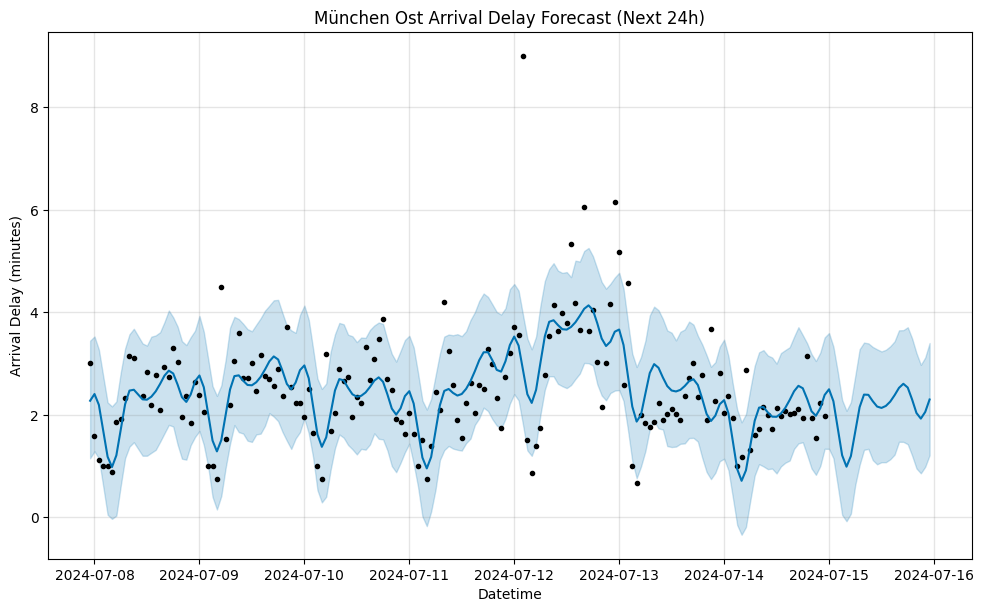

In [21]:
fig = model.plot(forecast)
plt.title(f"{station} Arrival Delay Forecast (Next 24h)")
plt.ylabel("Arrival Delay (minutes)")
plt.xlabel("Datetime")
plt.show()

###Components Plot (trend, weekly, daily, hourly)

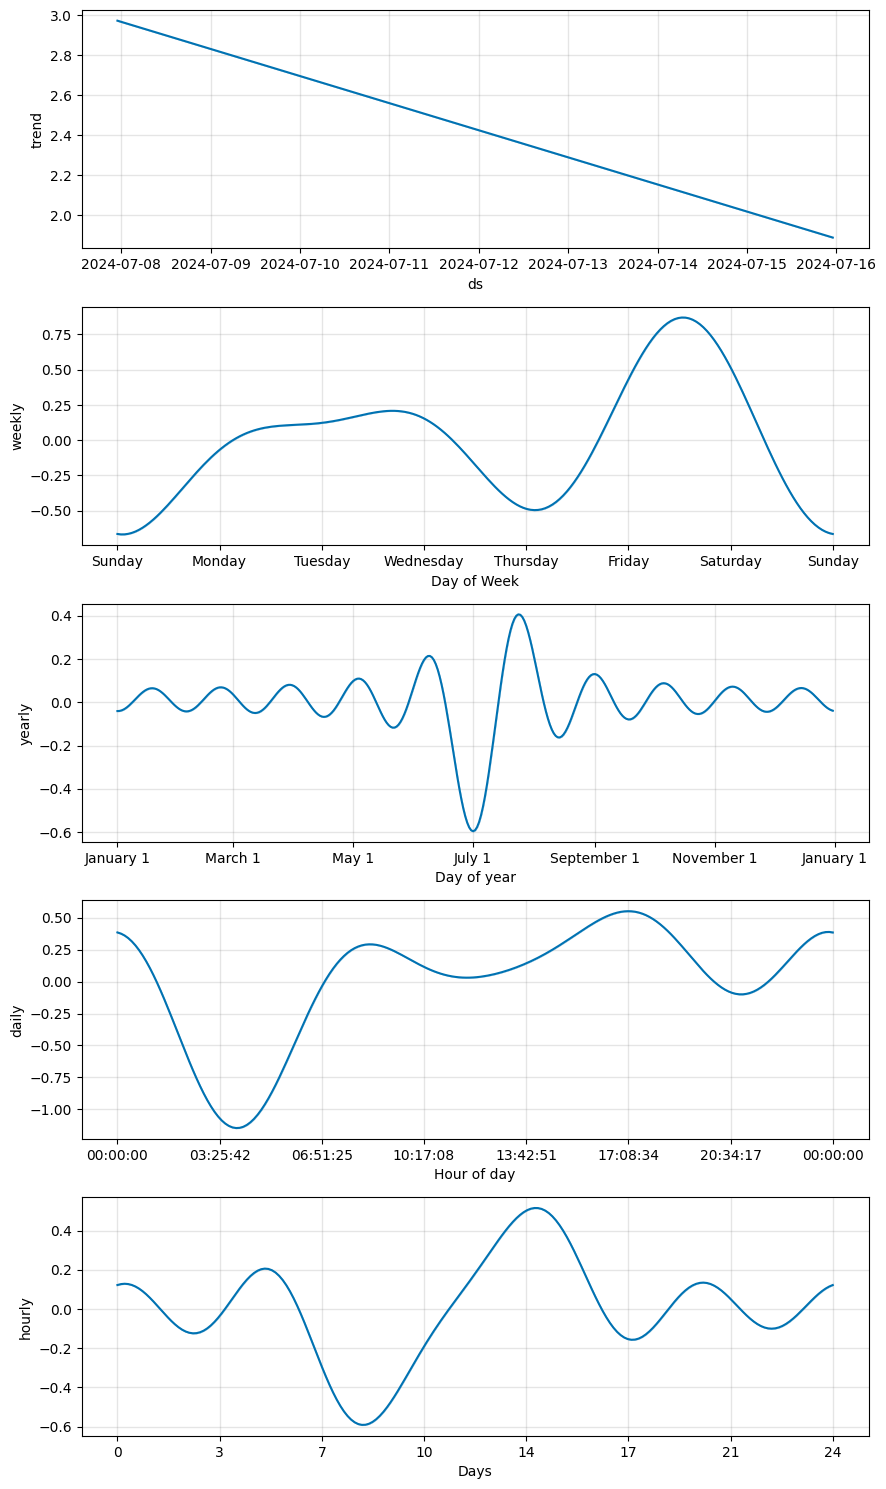

In [22]:
fig2 = model.plot_components(forecast)
plt.show()

####The Prophet model is used to forecast hourly train delays for München Ost station, capturing daily and weekly patterns as well as intra-day fluctuations. The model provides predictions for the next 24 hours, highlighting periods with higher likelihood of delays, such as peak rush hours. Results show that short-term train delay trends can be effectively predicted, and this approach can be generalized to other stations or trains. For very short datasets, the trend is usually flat or slightly sloped.